<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/ML%E5%9F%BA%E7%A1%80002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/FareTrain.csv.zip
!unzip FareTrain.csv.zip

--2024-02-25 18:16:07--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/FareTrain.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25480441 (24M) [application/zip]
Saving to: ‘FareTrain.csv.zip’

FareTrain.csv.zip   100%[===================>]  24.30M  --.-KB/s    in 0.1s    

2024-02-25 18:16:08 (223 MB/s) - ‘FareTrain.csv.zip’ saved [25480441/25480441]

Archive:  FareTrain.csv.zip
  inflating: FareTrain.csv           


In [2]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/FareTest.csv.zip
!unzip FareTest.csv.zip

--2024-02-25 18:16:12--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/FareTest.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197622 (193K) [application/zip]
Saving to: ‘FareTest.csv.zip’

FareTest.csv.zip    100%[===================>] 192.99K  --.-KB/s    in 0.004s  

2024-02-25 18:16:12 (48.9 MB/s) - ‘FareTest.csv.zip’ saved [197622/197622]

Archive:  FareTest.csv.zip
  inflating: FareTest.csv            


In [3]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/nyc_-74.3_-73.7_40.5_40.9.png

--2024-02-25 18:16:15--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/nyc_-74.3_-73.7_40.5_40.9.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4173016 (4.0M) [image/png]
Saving to: ‘nyc_-74.3_-73.7_40.5_40.9.png’

nyc_-74.3_-73.7_40. 100%[===================>]   3.98M  --.-KB/s    in 0.02s   

2024-02-25 18:16:16 (174 MB/s) - ‘nyc_-74.3_-73.7_40.5_40.9.png’ saved [4173016/4173016]



In [4]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/nyc_-74.5_-72.8_40.5_41.8.png

--2024-02-25 18:16:18--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/nyc_-74.5_-72.8_40.5_41.8.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2400651 (2.3M) [image/png]
Saving to: ‘nyc_-74.5_-72.8_40.5_41.8.png’

nyc_-74.5_-72.8_40. 100%[===================>]   2.29M  --.-KB/s    in 0.03s   

2024-02-25 18:16:18 (75.7 MB/s) - ‘nyc_-74.5_-72.8_40.5_41.8.png’ saved [2400651/2400651]



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 第1步：加载数据集

In [6]:
train = pd.read_csv("FareTrain.csv", nrows=1000000) # 加载训练集

In [7]:
test = pd.read_csv("FareTest.csv") # 加载测试集

## 第2步：数据分析、清洗

In [8]:
train.shape # 训练集的形状

(1000000, 8)

In [9]:
test.shape # 测试集的形状

(9914, 7)

In [10]:
train.head() # 默认显示前5行训练集数据

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009/6/15 17:26,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010/1/5 16:52,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011/8/18 0:35,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012/4/21 4:30,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010/3/9 7:51,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [11]:
test.head() # 默认显示前5行测试集数据

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [12]:
train.describe() # 训练集描述

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [13]:
test.describe() # 测试集描述

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


### 1.检查数据中是否有空值

In [14]:
train.isnull().sum().sort_values(ascending=True) # 统计字段空值数量，根据数量大小排序

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
passenger_count       0
dropoff_longitude    10
dropoff_latitude     10
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending=True) # 统计字段空值数量，根据数量大小排序

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
# 删除掉train中为空的数据
train.drop(train[train.isnull().any(1)].index, axis=0, inplace=True)

<ipython-input-16-16530009abe4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  train.drop(train[train.isnull().any(1)].index, axis=0, inplace=True)


In [17]:
train.shape

(999990, 8)

### 2.检查车费fare_amount这一列

In [18]:
# 查看车费这列数据（车费不可能为负数）
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [19]:
# 统计train中车费小于0的数据有多少
from collections import Counter

Counter(train['fare_amount']<0)

Counter({False: 999952, True: 38})

Text(0.5, 1.0, 'Fare Histogram')

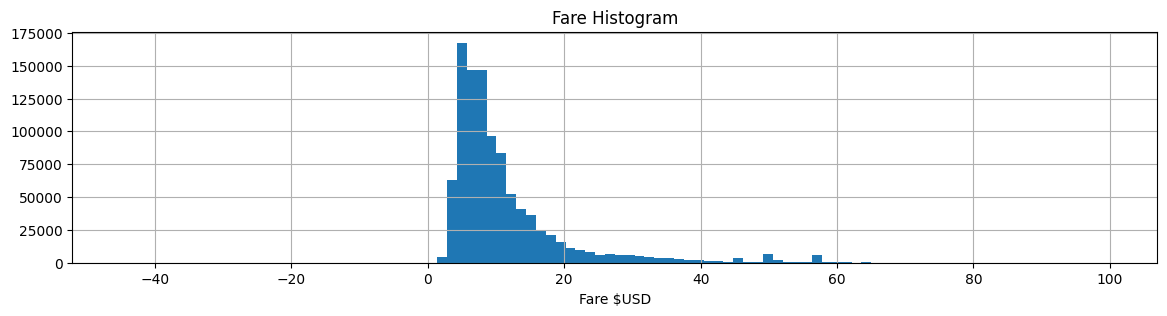

In [20]:
# 可视化（直方图）：0<票价<100
train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fare $USD')
plt.title("Fare Histogram")

### 3.检查乘客passenger_count这一列

In [21]:
# 检查乘客列的数据
train['passenger_count'].describe()

count    999990.000000
mean          1.684941
std           1.323907
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [22]:
# 查看乘客人数大于6的数据
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009/7/30 11:54,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [23]:
# 删除掉这个离异值
train.drop(train[train['passenger_count']>6].index, axis=0, inplace=True)

### 4.检查上车点的经度和纬度

1. 纬度范围：-90 ~ 90
2. 经度范围：-180 ~ 180

In [24]:
# 查看上车点纬度数据（min和max的值异常）
train['pickup_latitude'].describe()

count    999989.000000
mean         39.929080
std           7.625987
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [25]:
# 纬度小于-90的数据
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012/8/3 7:43,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012/3/11 1:56,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011/10/28 13:53,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [26]:
# 经度大于90的数据
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011/7/30 11:15,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011/11/21 21:36,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011/4/23 2:55,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012/3/5 20:58,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012/3/5 21:08,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012/3/16 8:13,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012/3/22 21:40,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012/5/24 22:44,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012/4/12 7:31,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [27]:
# 删除掉这些离异值数据

train.drop(train[(train['pickup_latitude']<-90) | (train['pickup_latitude']>90)].index, axis=0, inplace=True)

In [28]:
train.shape

(999977, 8)

In [29]:
# 查看上车点经度数据
train['pickup_longitude'].describe()

count    999977.000000
mean        -72.525423
std          10.692798
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [30]:
# 查看经度小于-180的数据

train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012/1/12 13:36,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012/6/3 23:21,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012/8/2 10:38,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012/2/3 7:53,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012/5/4 23:19,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012/7/21 15:23,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013/5/23 15:23,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011/10/28 10:53,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012/7/17 8:38,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012/3/4 0:10,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [31]:
# 删除掉这些离异值

train.drop(train[train['pickup_longitude']<-180].index, axis=0, inplace=True)

In [32]:
train.shape

(999966, 8)

### 5.检查下车点的经度和纬度

In [33]:
# 删除掉那些纬度小于-90，大于90的数据

train.drop(train[(train['dropoff_latitude']<-90) | (train['dropoff_latitude']>90)].index, axis=0, inplace=True)

In [34]:
# 删除掉那些经度小于-180，大于180的数据

train.drop(train[(train['dropoff_longitude']<-180) | (train['dropoff_longitude']>180)].index, axis=0, inplace=True)

In [35]:
train.shape

(999949, 8)

### 6.可视化地图，清理一些离异值

In [36]:
# 1.在test数据集上确定一个区域框，删除掉train数据集中不在区域框内的奇异点

# （1）纬度最小值，纬度最大值
min(test.pickup_latitude.min(), test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(), test.dropoff_latitude.max())

(40.568973, 41.709555)

In [37]:
# （2）经度最小值，经度最大值
min(test.pickup_longitude.min(), test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(), test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [38]:
# （3）根据指定的区域框，除掉那些奇异点

def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [39]:
BB = (-74.5, -72.8, 40.5, 41.8)
# 截图
nyc_map = plt.imread('nyc_-74.5_-72.8_40.5_41.8.png')

In [40]:
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
# 放大后的地图
# 截图（放大）
nyc_map_zoom = plt.imread('nyc_-74.3_-73.7_40.5_40.9.png')

In [41]:
# 删除区域框之外的点
train = train[select_within_boundingbox(train, BB)]

In [42]:
train.shape

(979052, 8)

In [43]:
# （4）在地图显示这些点

def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    # 第一个子图
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, alpha=alpha, c='r', s=s)
    axs[0].set_xlim(BB[0], BB[1])
    axs[0].set_ylim(BB[2], BB[3])
    axs[0].set_title('PickUp Locations')
    axs[0].imshow(nyc_map, extent=BB)

    # 第二个子图
    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, extent=BB)

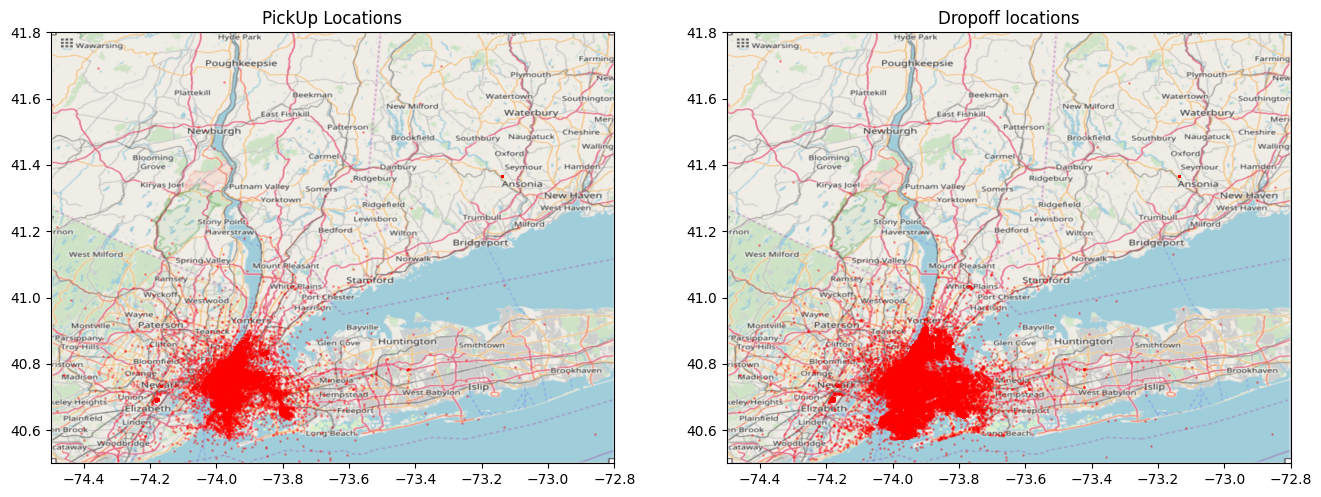

In [44]:
plot_on_map(train, BB, nyc_map, s=1, alpha=0.3)

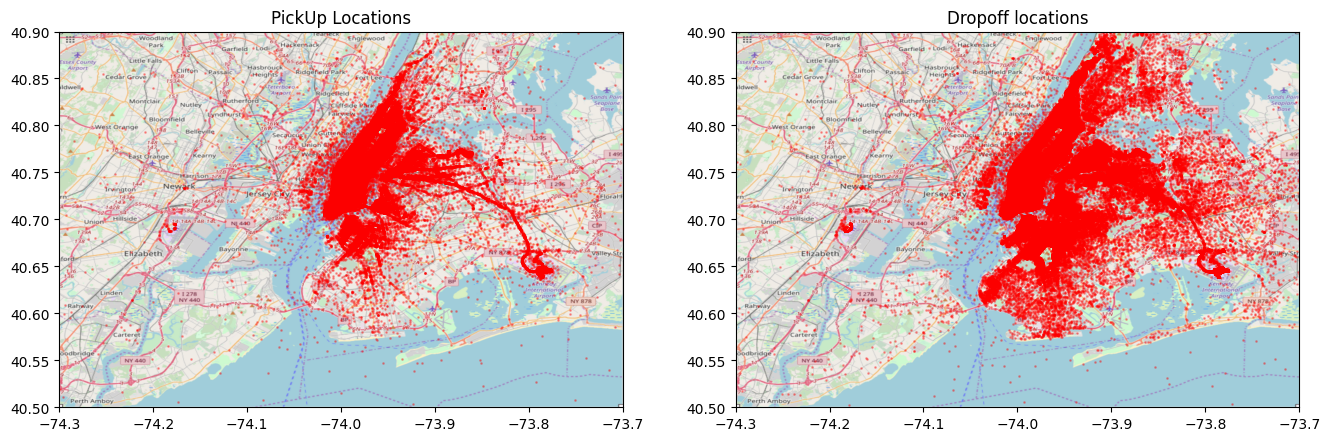

In [45]:
plot_on_map(train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

### 7.检查数据类型

In [46]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [47]:
# 日期类型转换：key / pickup_datetime

for dataset in [train, test]:
    dataset['key'] = pd.to_datetime(dataset['key'])
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])

### 8.日期数据进行分析
将日期分隔为：<br/>
1. year <br/>
2. month <br/>
3. day <br/>
4. hour <br/>
5. day of week <br/>

In [48]:
# 增加5列，分别是：year, month, day, hour, day of week

for dataset in [train, test]:
    dataset['year'] = dataset['pickup_datetime'].dt.year
    dataset['month'] = dataset['pickup_datetime'].dt.month
    dataset['day'] = dataset['pickup_datetime'].dt.day
    dataset['hour'] = dataset['pickup_datetime'].dt.hour
    dataset['day of week'] = dataset['pickup_datetime'].dt.dayofweek

In [49]:
dataset['key'].head()

0   2015-01-27 13:08:24.000000200
1   2015-01-27 13:08:24.000000300
2   2011-10-08 11:53:44.000000200
3   2012-12-01 21:12:12.000000200
4   2012-12-01 21:12:12.000000300
Name: key, dtype: datetime64[ns]

In [50]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week
0,2009-06-15 17:26:00,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,2010-01-05 16:52:00,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,2011-08-18 00:35:00,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,2012-04-21 04:30:00,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,2010-03-09 07:51:00,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1


In [51]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5


### 9.根据经纬度计算距离

In [52]:
# 计算公式

def distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  # 地球半径（单位：千米）
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*c
        d = (R * c) # 单位：千米
        i['H_Distance'] = d
    return d

In [53]:
distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [54]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
0,2009-06-15 17:26:00,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.030764
1,2010-01-05 16:52:00,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,8.450134
2,2011-08-18 00:35:00,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,1.389525
3,2012-04-21 04:30:00,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,2.799270
4,2010-03-09 07:51:00,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,1.999157


In [55]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5,5.387301


In [56]:
# 统计距离为0，票价为0的数据

train[(train['H_Distance']==0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
331597,2013-08-05 06:45:00,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1,2013,8,5,6,0,0.0
436658,2015-03-04 22:33:00,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1,2015,3,4,22,2,0.0
689250,2015-05-27 23:10:00,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1,2015,5,27,23,2,0.0


In [57]:
# 删除
train.drop(train[(train['H_Distance']==0) & (train['fare_amount']==0)].index, axis=0, inplace=True)

In [58]:
# 统计距离为0，票价不为0的数据

# 原因1：司机等待乘客很长时间，乘客最终取消了订单，乘客依然支付了等待的费用；
# 原因2：车辆的经纬度没有被准确录入或缺失；

len(train[(train['H_Distance']==0) & (train['fare_amount']!=0)])

10481

In [59]:
# 删除
train.drop(train[(train['H_Distance']==0) & (train['fare_amount']!=0)].index, axis=0, inplace=True)

### 10.每公里车费：根据距离、车费，计算每公里的车费

In [60]:
train['fare_per_mile'] = train.fare_amount / train.H_Distance

train.fare_per_mile.describe()

count    9.685680e+05
mean     8.684993e+01
std      4.914036e+03
min     -5.885613e+03
25%      2.968011e+00
50%      3.821174e+00
75%      5.051450e+00
max      1.472989e+06
Name: fare_per_mile, dtype: float64

In [61]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance,fare_per_mile
0,2009-06-15 17:26:00,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.030764,4.365694
1,2010-01-05 16:52:00,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,8.450134,1.999968
2,2011-08-18 00:35:00,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,1.389525,4.102121
3,2012-04-21 04:30:00,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,2.799270,2.750717
4,2010-03-09 07:51:00,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,1.999157,2.651118


Text(0, 0.5, 'Fare $USD/mile')

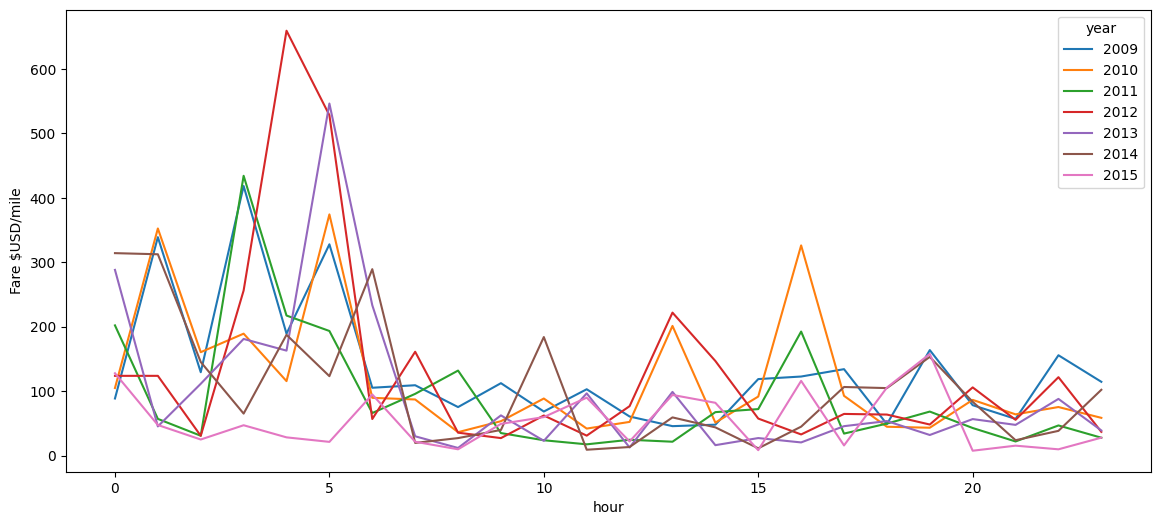

In [62]:
# 统计每一年的不同时间段的每小时车费

train.pivot_table('fare_per_mile', index='hour', columns='year').plot(figsize=(14, 6))
plt.ylabel('Fare $USD/mile')

## 第3步：模型训练和数据预测

In [63]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'year', 'month', 'day', 'hour', 'day of week',
       'H_Distance', 'fare_per_mile'],
      dtype='object')

In [64]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'day of week', 'H_Distance'],
      dtype='object')

In [65]:
X_train = train.iloc[:, [3,4,5,6,7,8,9,10,11,12,13]]

In [66]:
y_train = train.iloc[:, [1]] # fare_amount 车费

In [67]:
X_train.shape

(968568, 11)

In [68]:
y_train.shape

(968568, 1)

In [69]:
# 随机森林实现

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

<ipython-input-69-f5c1aa6df5ce>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [70]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'day of week', 'H_Distance'],
      dtype='object')

In [71]:
rf_predict = rf.predict(test.iloc[:, [2,3,4,5,6,7,8,9,10,11,12]])

In [72]:
rf_predict

array([ 9.505 , 10.665 ,  4.472 , ..., 50.1842, 18.125 ,  8.45  ])